# Workshop 3: Trabalho prático de Classificação

<a id="section_intro"></a>
##  Introdução

Este trabalho consite na aplicação de três modelos de classificação onde utilizamos os dados de pacientes com câncer de mama obtido a partir da atualização de novembro de 2017 do Programa SEER do NCI, que fornece informações sobre estatísticas de câncer de base populacional. O conjunto de dados envolveu pacientes do sexo feminino com câncer de mama de ducto infiltrante e carcinoma lobular (SEER primary cita recode NOS histology codes 8522/3) diagnosticados em 2006-2010. Pacientes com tamanho de tumor desconhecido, LNs regionais examinados, LNs regionais positivos e pacientes cujos meses de sobrevida foram inferiores a 1 mês foram excluídos; assim, 4.024 pacientes foram finalmente incluídos. Onde vamos classificar se o paciente sobrevive ou morre a doença.

## Importando pacotes que serão utilizados:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_theme(style='white')
sns.color_palette('hls', 8)

# import warnings
# warnings.filterwarnings("ignore", category=FutureWarning)

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.7612000000000001, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5012000000000001),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.43879999999999986, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6987999999999996)]

## Importando os dados que serão utilizados

In [2]:
df = pd.read_csv('../Workshop-3-DS-Digital-House/Breast_Cancer.csv')
df_orig = df.copy()

## Checando dados

In [3]:
df_orig.head()

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead


## Colunas do data set


1. Age - Idade no momento do diagnóstico
2. Race - Raça do paciente
3. Marital Status - Estado Civil
4. T Stage - Indica o tamanho do tumor primário(no ductor mamario) e se dessiminou para a vizinhaça.
    - T1 - sem evidência de tumor primario
    - T2 - Tumor de 1 a 2 centimetros
    - T3 - Tumor de 2 a 5 centimetros
    - T4 - Tumor com mais do que 5 centimetros
5. N Stage - Existência de disseminação da doença para os linfonodos regionais.
6. 6th Stage Grade - combinação de variáveis para denotar o estágio (mesmo campo que GRADE)
7. A Stage - Localidade do cancer (regional ou espalhado pelo corpo)
8. Tumor Size - Tamanho do cancer em milimetros
9. Estrogen Status - Status do estrogênio na paciente (null para casos em que não há cancer de mama)
10. Progesterone Status - Status da progesterona na paciente (null para casos em que não há cancer de mama)
11. Regional Node Examined - Quantidade de nódulos regionais removidos e inspecionados pelo patologista
12. Reginal Node Positive - quantidade de nódulos examinados que contém metastases
13. Survival Months - tempo de sobrevivência
14. Status - Status da paciente (vivo ou morto)

In [4]:
df_orig[['Age','Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']].describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


## Removendo, ajustando e manipulando informações

###  removendo coluna "unamed" e renomeando colunas para utilizar

In [5]:
df = df.drop(['Unnamed: 3'], axis=1)
df.rename(columns = {'Race ': 'Race',
                     'Marital Status': 'Marital_Status',
                     'T Stage ': 'T_Stage',
                     'N Stage': 'N_Stage',
                     '6th Stage': '6th_Stage',
                     'A Stage': 'A_Stage',
                     'Tumor Size': 'Tumor_Size',
                     'Estrogen Status': 'Estrogen_Status',
                     'Progesterone Status': 'Progesterone_Status',
                     'Regional Node Examined': 'Regional_Node_Examined',
                     'Reginol Node Positive': 'Regional_Node_Positive',
                     'Survival Months': 'Survival_Months'}, 
            inplace=True)

In [6]:
df.columns

Index(['Age', 'Race', 'Marital_Status', 'T_Stage', 'N_Stage', '6th_Stage',
       'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status',
       'Progesterone_Status', 'Regional_Node_Examined',
       'Regional_Node_Positive', 'Survival_Months', 'Status'],
      dtype='object')

### checando nulos

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital_Status          4024 non-null   object
 3   T_Stage                 4024 non-null   object
 4   N_Stage                 4024 non-null   object
 5   6th_Stage               4024 non-null   object
 6   Grade                   4024 non-null   object
 7   A_Stage                 4024 non-null   object
 8   Tumor_Size              4024 non-null   int64 
 9   Estrogen_Status         4024 non-null   object
 10  Progesterone_Status     4024 non-null   object
 11  Regional_Node_Examined  4024 non-null   int64 
 12  Regional_Node_Positive  4024 non-null   int64 
 13  Survival_Months         4024 non-null   int64 
 14  Status                  4024 non-null   object
dtypes: i

### Manipulando variáveis para ajudar na visualização

In [8]:
# convertendo a categoria 'race'
df['Race'] = df['Race'].replace(
    'Other (American Indian/AK Native, Asian/Pacific Islander)', 'Other'
)

# ajustando categoria Marital_Status
df['Marital_Status'] = df['Marital_Status'].replace(
    ['Married (including common law)', 'Single (never married)'] , ['Married', 'Single']
)

df['Grade'] = df['Grade'].replace(
    ['Moderately differentiated; Grade II', 'Poorly differentiated; Grade III', 'Well differentiated; Grade I', 'Undifferentiated; anaplastic; Grade IV'],
     ['Moderately_differentiated', 'Poorly_differentiated', 'Well_differentiated', 'Undifferentiated']
)

In [9]:
df['Grade'].value_counts()

Moderately_differentiated    2351
Poorly_differentiated        1111
Well_differentiated           543
Undifferentiated               19
Name: Grade, dtype: int64

## Checando variáveis

### Distribuição de idade

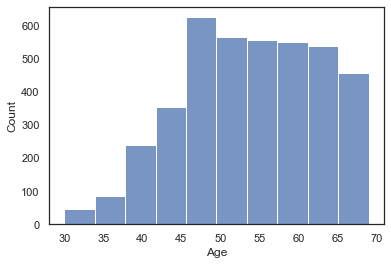

In [10]:
sns.histplot(df, x='Age', bins= 10)
plt.show()

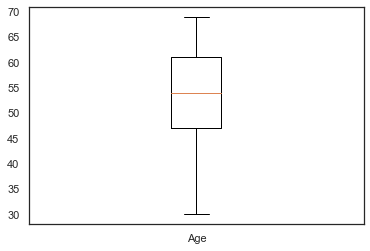

In [11]:
plt.boxplot(df.Age, labels=['Age']);

### Distribuição de etnias

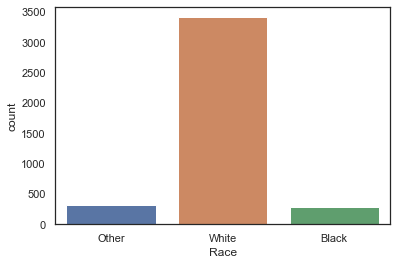

In [12]:
sns.countplot(x='Race', data = df)
plt.show()

### Estado Civil

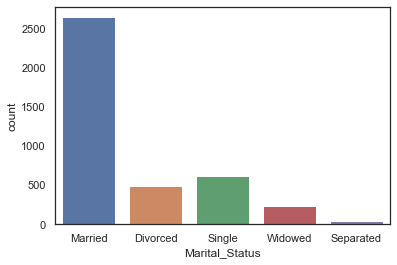

In [13]:
sns.countplot(x='Marital_Status', data = df)
plt.show()

### Estágio do cancer

Lembrando que:
* T Stage - estagio do cancer
    - T1 - sem evidência de tumor primario
    - T2 - Tumor de 1 a 2 centimetros
    - T3 - Tumor de 2 a 5 centimetros
    - T4 - Tumor com mais do que 5 centimetros

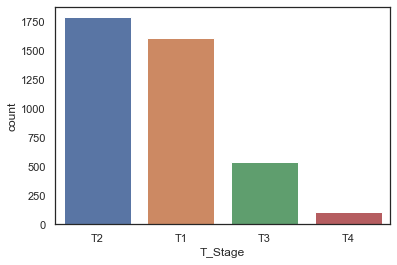

In [14]:
sns.countplot(x='T_Stage', data = df)
plt.show()

### estágio do cancer (análogo à GRADE)

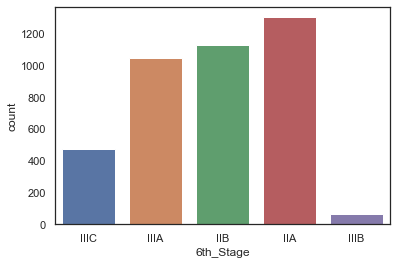

In [15]:
sns.countplot(x='6th_Stage', data = df)
plt.show()

### Diferenciação do tipo de cancer

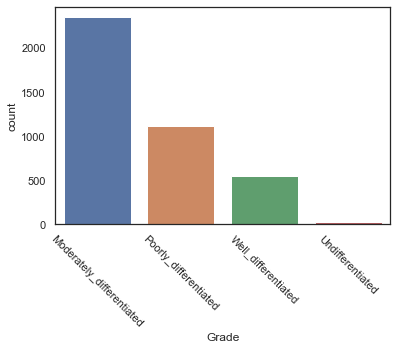

In [16]:
sns.countplot(x='Grade', data = df)
plt.xticks(rotation = -45)
plt.show()

### Classificação da posição do câncer

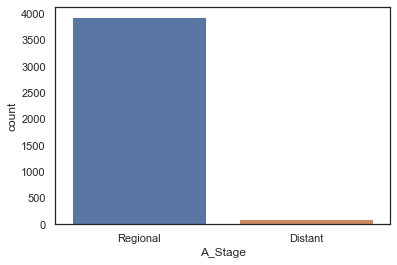

In [17]:
sns.countplot(x='A_Stage', data = df)
plt.show()

### Distribuição de tamanho dos tumores

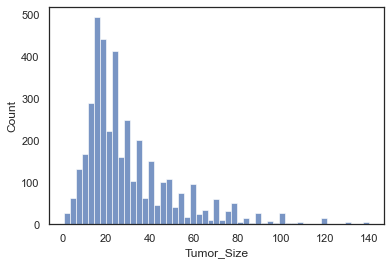

In [18]:
sns.histplot(x='Tumor_Size', data = df)
plt.show()

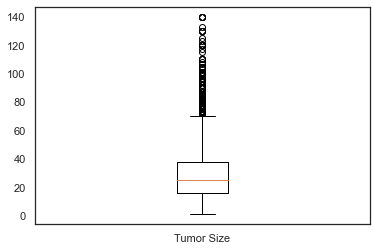

In [19]:
plt.boxplot(df.Tumor_Size, labels=['Tumor Size']);

### Status do estrogênio na paciente

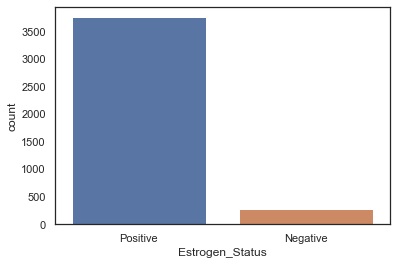

In [20]:
sns.countplot(x = 'Estrogen_Status', data = df)
plt.show()

### Status da progesterona na paciente

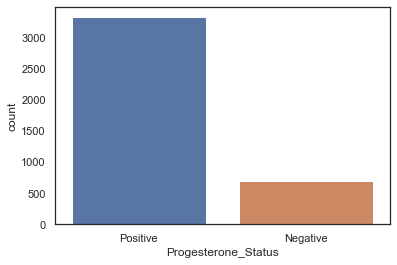

In [21]:
sns.countplot(x = 'Progesterone_Status', data = df)
plt.show()

### Quantidade de nódulos regionais examinados

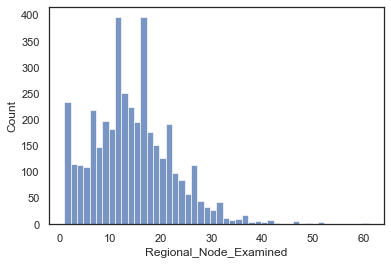

In [22]:
sns.histplot(x = 'Regional_Node_Examined', data = df)
plt.show()

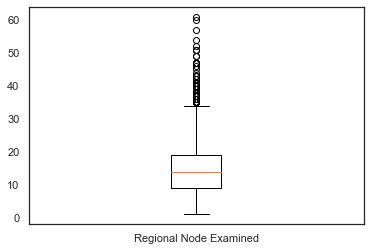

In [23]:
plt.boxplot(df.Regional_Node_Examined, labels=['Regional Node Examined']);

### Quantidade de nódulos regionais examinados - positivos para metastase (câncer)

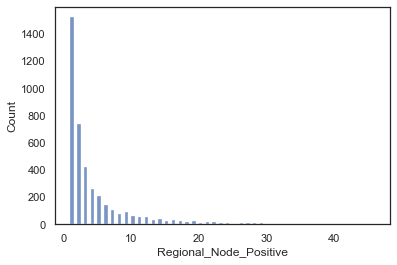

In [24]:
sns.histplot(x = 'Regional_Node_Positive', data = df)
plt.show()

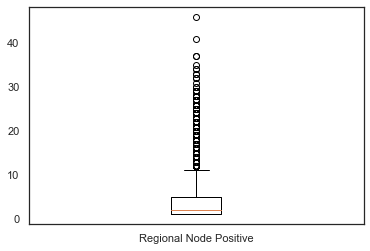

In [25]:
plt.boxplot(df.Regional_Node_Positive, labels=['Regional Node Positive']);

### Distribuição de "meses de sobrevivência da paciente"

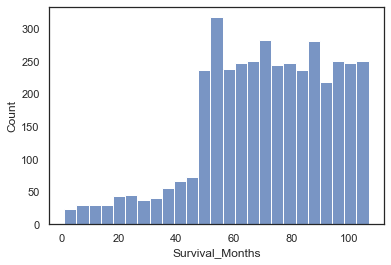

In [26]:
sns.histplot(x = 'Survival_Months', data = df)
plt.show()

### proporção de pacientes vivos/mortos

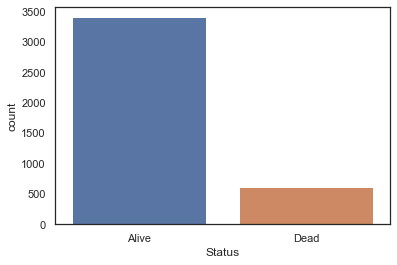

In [27]:
sns.countplot(x = 'Status', data = df)
plt.show()

In [28]:
df.Status.value_counts()

Alive    3408
Dead      616
Name: Status, dtype: int64

### Correlações

Legenda Status: Dead = 0, Alive = 1


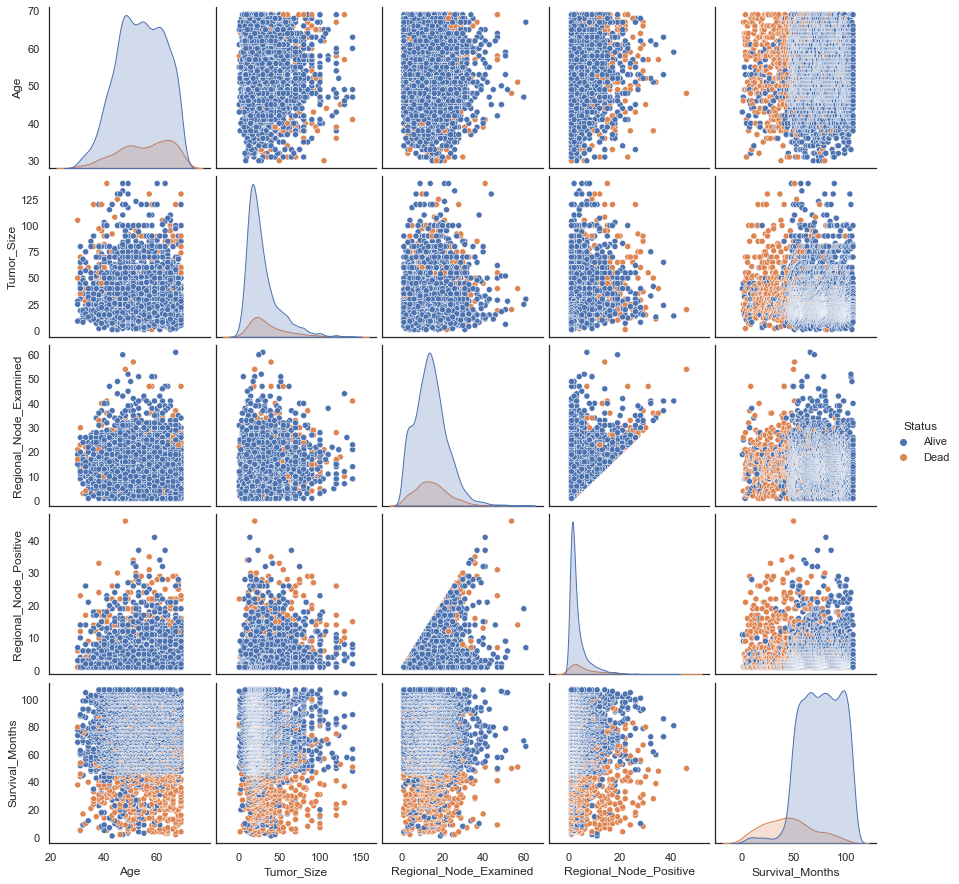

In [29]:
sns.pairplot(df, hue = 'Status')
print('Legenda Status: Dead = 0, Alive = 1')
plt.show()

In [30]:
# Modificando Coluna Status para Dummy (0 = Dead, 1 = Alive)
df['Status'].replace(['Dead','Alive'],[0,1], inplace = True)
df.sample(5)

,Age,Race,Marital_Status,T_Stage,N_Stage,6th_Stage,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Regional_Node_Positive,Survival_Months,Status
1586,41,Other,Married,T2,N1,IIB,Poorly_differentiated,Regional,35,Negative,Negative,18,2,66,1
850,39,White,Married,T2,N1,IIB,Poorly_differentiated,Regional,35,Positive,Positive,8,3,54,1
3448,53,White,Married,T1,N2,IIIA,Moderately_differentiated,Regional,10,Positive,Positive,13,6,97,0
3460,47,White,Married,T4,N2,IIIB,Poorly_differentiated,Distant,54,Positive,Positive,11,6,98,1
1487,36,Other,Married,T2,N2,IIIA,Moderately_differentiated,Regional,24,Positive,Positive,21,5,64,1


### Correlação entre as variáveis

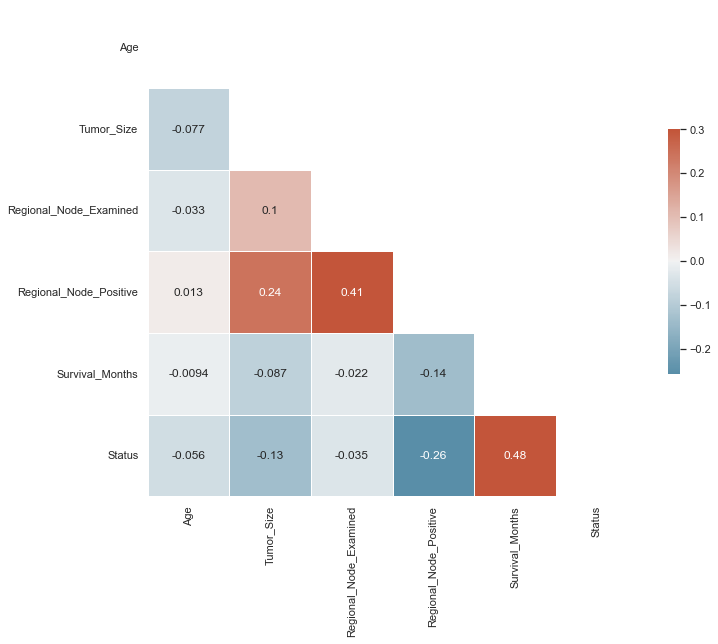

In [31]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

## Processamento pré-modelagem

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # para normalizar os dados
from sklearn.model_selection import KFold, GridSearchCV# use for cross validation and for tuning parameter

#### Codificação das Variáveis

In [33]:
from sklearn.preprocessing import OrdinalEncoder

#Codificando variáveis categóricas ordinais
ord_enc = OrdinalEncoder(dtype = int)
for col in ['T_Stage', 'N_Stage', '6th_Stage', 'Grade']:
    df[col] = ord_enc.fit_transform(df[col].values.reshape(-1, 1))
    
#Criando dummies para variáveis categóricas não ordinais
df = pd.get_dummies(df, columns = ['Race', 'Marital_Status', 'A_Stage', 'Estrogen_Status', 'Progesterone_Status'], drop_first = True)

#### Lidando com Dataset Assimétrico

In [34]:
#Pegar sample de vivos do mesmo tamanho de mortos (deixar o dataset simétrico)
df_alive = df[df['Status'] == 1]
df_simetrico = pd.concat([df[df['Status'] == 0], df_alive.sample(df['Status'].value_counts()[0], random_state = 42)])

In [35]:
df_simetrico.sample(5)

,Age,T_Stage,N_Stage,6th_Stage,Grade,Tumor_Size,Regional_Node_Examined,Regional_Node_Positive,Survival_Months,Status,Race_Other,Race_White,Marital_Status_Married,Marital_Status_Separated,Marital_Status_Single,Marital_Status_Widowed,A_Stage_Regional,Estrogen_Status_Positive,Progesterone_Status_Positive
2058,56,1,0,1,0,49,15,4,74,1,0,1,1,0,0,0,1,1,1
1507,47,0,1,2,0,13,13,4,64,1,0,1,0,0,0,0,1,1,1
2975,68,1,0,1,3,30,3,1,89,1,0,1,1,0,0,0,1,1,1
29,66,1,0,1,0,30,9,1,6,0,1,0,0,0,0,1,1,1,1
224,64,2,2,4,1,60,30,28,29,0,0,1,0,0,0,1,1,1,1


In [36]:
df_simetrico.shape

(1232, 19)

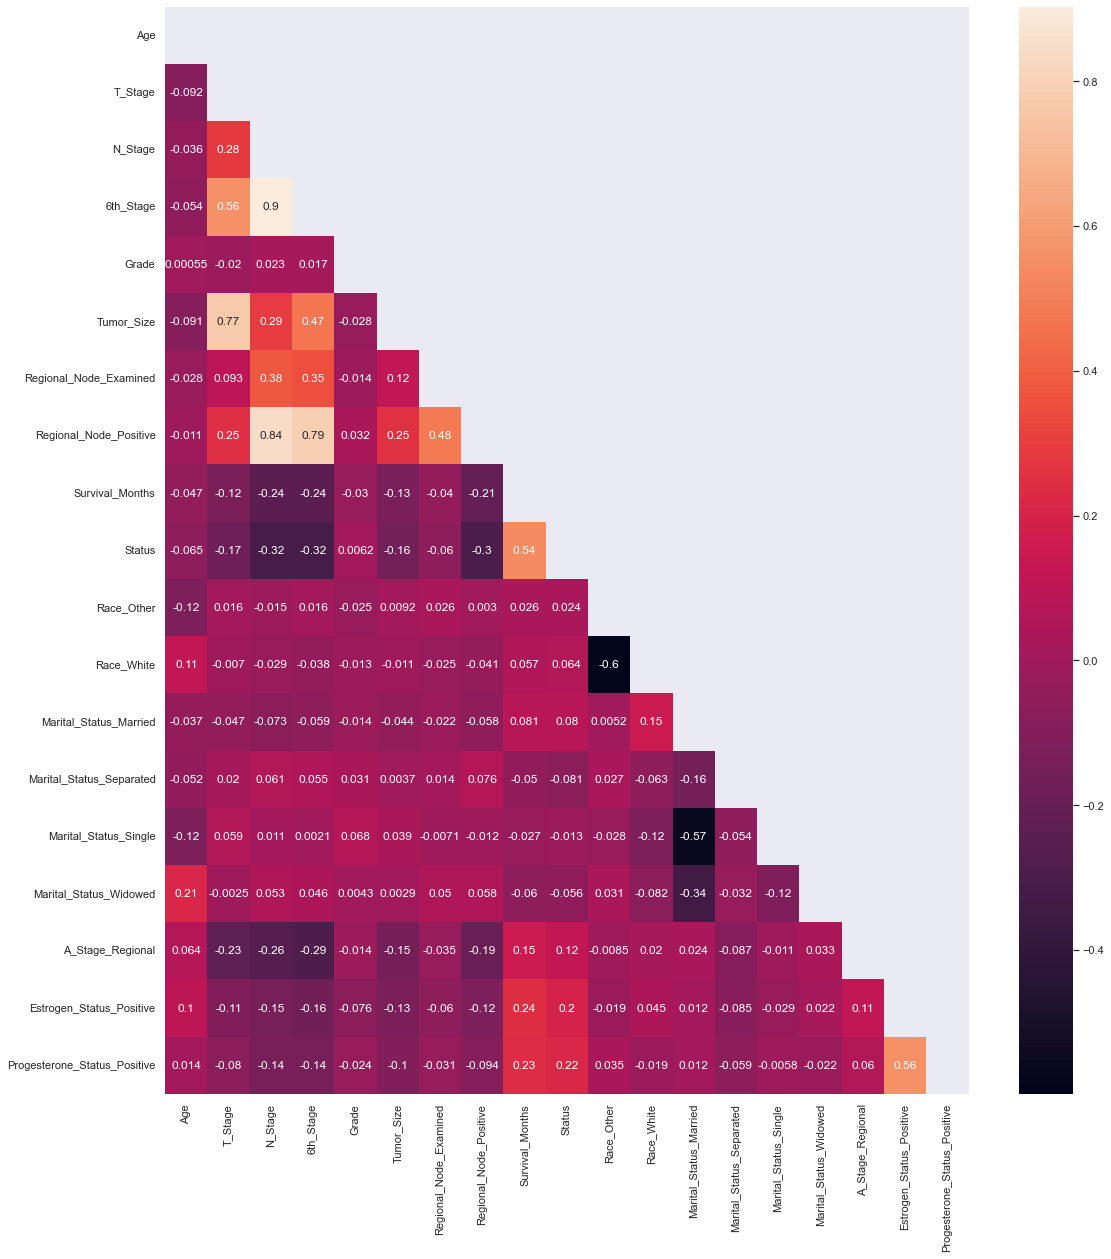

In [37]:
sns.set(rc={'figure.figsize':(18,20)})
sns.heatmap(df_simetrico.corr(), annot=True, mask = np.triu(np.ones_like(df_simetrico.corr(), dtype=bool)));

#### Definindo Features e Target

In [38]:
features = ['Age', 'T_Stage', 'N_Stage', '6th_Stage', 'Grade', 'Tumor_Size', 'Regional_Node_Examined', 'Regional_Node_Positive', 'Survival_Months', 'Status', 'Race_Other', 'Race_White', 'Marital_Status_Married', 'Marital_Status_Separated', 'Marital_Status_Single', 'Marital_Status_Widowed', 'A_Stage_Regional', 'Estrogen_Status_Positive',	'Progesterone_Status_Positive']

X = df_simetrico[features]
y = df_simetrico['Status']

#### Splits

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

#### Normalização de variáveis numéricas

In [40]:
numericals = ['Age', 'Tumor_Size', 'Regional_Node_Examined', 'Regional_Node_Positive', 'Survival_Months']

std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train[numericals])
X_test = std_scaler.transform(X_test[numericals])

## Modelagem e Validação

In [41]:
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.neighbors import KNeighborsClassifier # to apply KNN
from sklearn.naive_bayes import GaussianNB # to apply Gaussian Naive Bayes
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from xgboost import XGBClassifier # for XGBoost Ensamble Model

from sklearn import metrics # to check the accuracy and Confusion Matrix of the model
from sklearn.model_selection import cross_val_score # Checando o score para selecionar os melhores modelos

c:\Users\Felipe\anaconda3\envs\dhdsblend2022_main\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [42]:
# Criando comparação de acurácia entre os 5 modelos escolhidos

comparacao_modelos = pd.DataFrame(columns = ['Modelo', 'Score'])

modelos = [LogisticRegression(),
           KNeighborsClassifier(),
           GaussianNB(),
           RandomForestClassifier(),
           XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
           ]

for model in modelos:
    model_name = model.__class__.__name__
    scores = cross_val_score(model, X_train, y_train, cv = 10, scoring = 'accuracy')
    comparacao_modelos.loc[len(comparacao_modelos)] = [model_name, scores.mean().round(4)]

comparacao_modelos

,Modelo,Score
0,LogisticRegression,0.7565
1,KNeighborsClassifier,0.7111
2,GaussianNB,0.7468
3,RandomForestClassifier,0.7597
4,XGBClassifier,0.7446


In [43]:
import statsmodels.api as sm

def calc_vif(data):
    vif_df = pd.DataFrame(columns=['Var', 'VIF'])
    x_var_names = df.columns
    
    for i in range(0, x_var_names.shape[0]):
        y = df[x_var_names[i]]
        x = df[x_var_names.drop(x_var_names[i])]
        r2 = sm.OLS(y, x).fit().rsquared
        vif = round(1/(1-r2),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by='VIF',axis = 0, ascending=False, inplace=False)

calc_vif(X)

,Var,VIF
0,Age,28.94
3,6th_Stage,27.61
2,N_Stage,13.75
8,Survival_Months,13.52
1,T_Stage,11.41
5,Tumor_Size,9.28
9,Status,9.26
7,Regional_Node_Positive,6.32
6,Regional_Node_Examined,4.98
15,Marital_Status_Widowed,1.52
